# Modeling exercise

## General Instructions

* Submission date: 25.4.2022
* Submission Method: Link to your solution notebook in [this sheet](https://docs.google.com/spreadsheets/d/1fTmjiVxzw_rM1hdh16enwUTtxzlHSJIiw41dJS2LKp0/edit?usp=sharing).

In [123]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [124]:
import sys; sys.path.append('../Modles and Modeling/src')
import numpy as np
import plotly_express as px
from sklearn import svm


In [125]:
import pandas as pd
import ipywidgets as widgets

In [126]:
from datasets import make_circles_dataframe, make_moons_dataframe

## Fitting and Overfiting 

The goal of the following exercise is to:
* Observe overfitting due to insuffient data
* Observe Overfitting due to overly complex model
* Identify the overfitting point by looking at Train vs Test error dynamic
* Observe how noise levels effect the needed data samples and model capacity

To do so, you'll code an experiment in the first part, and analyze the experiment result in the second part.

### Building an experiment

Code:

1. Create data of size N with noise level of magnitude NL from datasets DS_NAME. 
1. Split it to training and validation data (no need for test set), use 80%-20%. 
1. Use Logistic regression and Choose one complex model of your choice: [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [SVM with RBF kernel](https://scikit-learn.org/stable/modules/svm.html) with different `gamma` values or [Random forest classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) with differnt number of `min_samples_split`. 
1. Train on the train set for different hyper parameter values. compute:
   1. Classification accuracy on the validation set (TRE)
   1. Classification accuracy on the validation set (TESTE)
   1. The difference beteen the two above (E_DIFF)
1. Save DS_NAME, N, NL, CLF_NAME, K, TRE, TESTE, E_DIFF and the regularization/hyper param (K, gamma or min_samples_split and regularization value for the linear regression classifier)

Repeat for:
* DS_NAME in Moons, Circles
* N (number of samples) in [5, 10, 50, 100, 1000, 10000]
* NL (noise level) in [0, 0.1, 0.2, 0.3, 0.4, 0.5]
* For the complex model: 10 Values of hyper parameter of the complex model you've chosen.
* For the linear model: 5 values of ridge (l2) regularization - [0.001, 0.01, 0.1, 1, 10, 100, 1000]

### Building Experiment - Solution

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score


In [128]:
circules_df_0_5 = make_circles_dataframe(5,0)
log_reg = LogisticRegression(penalty='l2', C=2.0)
log_reg.fit(circules_df_0_5[['x','y']], circules_df_0_5['label'])
#log_reg.fit(circules_df_0_5[['x','y'], 'label'])

LogisticRegression(C=2.0)

In [129]:
#single trial for logistic regression experiment
circules_df_0_5
kf1= KFold(n_splits=5, random_state=None, shuffle=True)
kf1.get_n_splits(circules_df_0_5)
for train_index, test_index in kf1.split(circules_df_0_5):
    print("TRAIN:", train_index, "TEST:", test_index)
    print(circules_df_0_5.iloc[train_index,[2]])
    print(circules_df_0_5.iloc[train_index,[0,1]])
    x_train = circules_df_0_5.iloc[train_index,[0,1]]
    y_train = circules_df_0_5.iloc[train_index,[2]]
    log_reg = LogisticRegression(penalty='l2', C=2.0)
    log_reg.fit(x_train, y_train.values.ravel())


TRAIN: [0 1 3 4] TEST: [2]
  label
0     B
1     B
3     A
4     B
     x        y
0 -0.4 -0.69282
1 -0.4  0.69282
3  1.0  0.00000
4  0.8  0.00000
TRAIN: [1 2 3 4] TEST: [0]
  label
1     B
2     A
3     A
4     B
     x             y
1 -0.4  6.928203e-01
2 -1.0  1.224647e-16
3  1.0  0.000000e+00
4  0.8  0.000000e+00
TRAIN: [0 1 2 4] TEST: [3]
  label
0     B
1     B
2     A
4     B
     x             y
0 -0.4 -6.928203e-01
1 -0.4  6.928203e-01
2 -1.0  1.224647e-16
4  0.8  0.000000e+00
TRAIN: [0 2 3 4] TEST: [1]
  label
0     B
2     A
3     A
4     B
     x             y
0 -0.4 -6.928203e-01
2 -1.0  1.224647e-16
3  1.0  0.000000e+00
4  0.8  0.000000e+00
TRAIN: [0 1 2 3] TEST: [4]
  label
0     B
1     B
2     A
3     A
     x             y
0 -0.4 -6.928203e-01
1 -0.4  6.928203e-01
2 -1.0  1.224647e-16
3  1.0  0.000000e+00


In [130]:
# #single trial for SVM experiment
# from sklearn import svm
# circules_df_0_5
# kf1= KFold(n_splits=5, random_state=None, shuffle=True)
# kf1.get_n_splits(circules_df_0_5)
# for train_index, test_index in kf1.split(circules_df_0_5):
#     print("TRAIN:", train_index, "TEST:", test_index)
#     print(circules_df_0_5.iloc[train_index,[2]])
#     print(circules_df_0_5.iloc[train_index,[0,1]])
#     x_train = circules_df_0_5.iloc[train_index,[0,1]]
#     y_train = circules_df_0_5.iloc[train_index,[2]]
#     svm_clf = svm.SVC(kernel='rbf', degree=2, gamma=2) # kernels availble: 'linear', 'poly', 'rbf'
#     svm_clf.fit(x_train, y_train.values.ravel())



### Code for solution

In [ ]:
from copy import deepcopy

#Declarations aDataFramessignments
datasets_type = ['circles', 'moons']
k_folds = 5
n_samples = [5,10,50,100,1000,10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_gamma_range = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kf1= KFold(n_splits=5, random_state=None, shuffle=True)

#dataframe for experiment's results:


kfold_cv_result=[]
iteration_result={}
results_list = []
experiment_result=[]

for ds_type in datasets_type:#dataset types circle or moon
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            print(f'Starting {k_folds}-fold cross validation for {ds_type} dataset with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                if ds_type=='circles':#starting to work with circles dataset
                    circules_df = make_circles_dataframe(n_samples=n, noise_level=nl)
                    #print(circules_df.head())

                    for train_index, test_index in kf1.split(circules_df):
                        #devided circules to train and test using Kfold
                        x_train = circules_df.iloc[train_index,[0,1]] 
                        x = circules_df.iloc[:,:-1] #all rows and columns except label (3rd column)
                        #print(x_train)
                        y_train = circules_df.iloc[train_index,[2]]
                        y= circules_df.iloc[:,-1]#all rows for label column only(3rd column)
                        #print(y_train)
                        x_test = circules_df.iloc[test_index,[0,1]]
                        #print(x_test)
                        y_test = circules_df.iloc[test_index,[2]]
                        #print(y_test)
                        for model in clf_types:
                            #print(model)
                            if model=='log_reg': #creating logistic regression in circle dataset
                                for regularization_value in regularization_values:
                                    log_reg = LogisticRegression(penalty='l2', C=regularization_value)
                                    #print(f'created logit with penalty 12 and regularization {regularization_value}')
                                    log_reg.fit(x_train, y_train.values.ravel()) #fit the logistic regression to train data
                                    #print('fit for logit completed')
                                    kfold_cv_result=cross_validate(log_reg,x,y, cv=kf1, return_train_score=True)
                                    #print(kfold_cv_result)
                                    TRE=sum(kfold_cv_result['train_score'])/k_folds
                                    TESTE = sum(kfold_cv_result['test_score'])/k_folds
                                    E_DIFF = TRE-TESTE
                                    iteration_result.update({"dataset name":ds_type, "samples": n, 
                                                             "noise level":nl, "model":model,"HyperParam/Regulaization":regularization_value,
                                                             "KFOLD": k, "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})
                                    print(iteration_result) 
                                    experiment_result.append(deepcopy(iteration_result))
                                    results_list.append(iteration_result)
                            elif model=='svm':  #creating SVM in circle dataset
                                for gamma_svm in hp_gamma_range:
                                    svm_clf = svm.SVC(kernel='rbf', degree=2, gamma=gamma_svm)
                                    svm_clf.fit(x_train, y_train.values.ravel())
                                    kfold_cv_result=cross_validate(svm_clf,x,y, cv=kf1, return_train_score=True)
                                    #print(kfold_cv_result)
                                    TRE=sum(kfold_cv_result['train_score'])/k_folds
                                    TESTE = sum(kfold_cv_result['test_score'])/k_folds
                                    E_DIFF = TRE-TESTE
                                    iteration_result.update({"dataset name":ds_type, "samples": n, 
                                    "noise level":nl, "model":model,"HyperParam/Regulaization":gamma_svm,
                                    "KFOLD": k, "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})
                                                            
                                    print(iteration_result)
                                    experiment_result.append(deepcopy(iteration_result))
                                    results_list.append(iteration_result)
                elif ds_type=='moons':#starting to work with moons dataset        
                    moon_df = make_moons_dataframe(n_samples=n, noise_level=nl)
                    #print(moon_df.head())
                    for train_index, test_index in kf1.split(moon_df):
                        #devided moon to train and test using Kfold
                        x_train = moon_df.iloc[train_index,[0,1]] 
                        x = moon_df.iloc[:,:-1] #all rows and columns except label (3rd column)
                        #print(x_train)
                        y_train = moon_df.iloc[train_index,[2]]
                        y= moon_df.iloc[:,-1]#all rows for label column only(3rd column)
                        #print(y_train)
                        x_test = moon_df.iloc[test_index,[0,1]]
                        #print(x_test)
                        y_test = moon_df.iloc[test_index,[2]]
                        #print(y_test)
                        for model in clf_types:
                            #print(model)
                            if model=='log_reg': #creating logistic regression in circle dataset
                                for regularization_value in regularization_values:
                                    log_reg = LogisticRegression(penalty='l2', C=regularization_value)
                                    #print(f'created logit with penalty 12 and regularization {regularization_value}')
                                    log_reg.fit(x_train, y_train.values.ravel()) #fit the logistic regression to train data
                                    #print('fit for logit completed')
                                    kfold_cv_result=cross_validate(log_reg,x,y, cv=kf1, return_train_score=True)
                                    #print(kfold_cv_result)
                                    TRE=sum(kfold_cv_result['train_score'])/k_folds
                                    TESTE = sum(kfold_cv_result['test_score'])/k_folds
                                    E_DIFF = TRE-TESTE
                                    iteration_result.update({"dataset name":ds_type, "samples": n, 
                                                             "noise level":nl, "model":model,"HyperParam/Regulaization":regularization_value,
                                                             "KFOLD": k, "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})
                                                            
                                    print(iteration_result)
                                    experiment_result.append(deepcopy(iteration_result))
                                    results_list.append(iteration_result)
                            elif model=='svm':  #creating SVM in circle dataset
                                for gamma_svm in hp_gamma_range:
                                    svm_clf = svm.SVC(kernel='rbf', degree=2, gamma=gamma_svm)
                                    svm_clf.fit(x_train, y_train.values.ravel())
                                    kfold_cv_result=cross_validate(svm_clf,x,y, cv=kf1, return_train_score=True)
                                    
                                    TRE=sum(kfold_cv_result['train_score'])/k_folds
                                    TESTE = sum(kfold_cv_result['test_score'])/k_folds
                                    E_DIFF = TRE-TESTE
                                    iteration_result.update({"dataset name":ds_type, "samples": n, 
                                    "noise level":nl, "model":model,"HyperParam/Regulaization":gamma_svm,
                                    "KFOLD": k, "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})
                                    print(iteration_result)    
                                    experiment_result.append(deepcopy(iteration_result))
                                    results_list.append(iteration_result)

Working on circles
Starting 5-fold cross validation for circles dataset with 5 samples and noise level 0. Going to train ['log_reg', 'svm'] classifiers.
{'dataset name': 'circles', 'samples': 5, 'noise level': 0, 'model': 'log_reg', 'HyperParam/Regulaization': 0.001, 'KFOLD': 0, 'TRE': 0.75, 'TESTE': 0.0, 'E_DIFF': 0.75}
{'dataset name': 'circles', 'samples': 5, 'noise level': 0, 'model': 'log_reg', 'HyperParam/Regulaization': 0.01, 'KFOLD': 0, 'TRE': 0.75, 'TESTE': 0.0, 'E_DIFF': 0.75}
{'dataset name': 'circles', 'samples': 5, 'noise level': 0, 'model': 'log_reg', 'HyperParam/Regulaization': 0.1, 'KFOLD': 0, 'TRE': 0.75, 'TESTE': 0.0, 'E_DIFF': 0.75}
{'dataset name': 'circles', 'samples': 5, 'noise level': 0, 'model': 'log_reg', 'HyperParam/Regulaization': 1, 'KFOLD': 0, 'TRE': 0.75, 'TESTE': 0.0, 'E_DIFF': 0.75}
{'dataset name': 'circles', 'samples': 5, 'noise level': 0, 'model': 'log_reg', 'HyperParam/Regulaization': 10, 'KFOLD': 0, 'TRE': 0.75, 'TESTE': 0.0, 'E_DIFF': 0.75}
{'datas

### Divided code solution 
#### logistic regression circles

In [151]:
from copy import deepcopy

#Declarations aDataFramessignments
datasets_type = ['circles', 'moons']
k_folds = 5
n_samples = [5,10,50,100,1000,10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
hp_gamma_range = [0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]
regularization_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
kf1= KFold(n_splits=5, random_state=None, shuffle=True)






In [152]:
#dataframe for experiment's results:
kfold_cv_result=[]
iteration_result={}
circules_logit_ver2=[]

# Working on circules with logistic regression
for nl in noise_levels:
    for n in n_samples:
        print(f'begin iterations with noise level {nl} and samples {n}')
        circules_df = make_circles_dataframe(n_samples=n, noise_level=nl)
        #print(circules_df.head())
        for train_index, test_index in kf1.split(circules_df):
            x_train = circules_df.iloc[train_index,[0,1]] 
            y_train = circules_df.iloc[train_index,[2]]
            x = circules_df.iloc[:,:-1] #all rows and columns except label (3rd column)
            y= circules_df.iloc[:,-1]#all rows for label column only(3rd column)
            x_test = circules_df.iloc[test_index,[0,1]]
            y_test = circules_df.iloc[test_index,[2]]
            for regularization_value in regularization_values:
                log_reg = LogisticRegression(penalty='l2', C=regularization_value)
                log_reg.fit(x_train, y_train.values.ravel()) #fit the logistic regression to train data
                kfold_cv_result=cross_validate(log_reg,x,y, cv=kf1, return_train_score=True)

                TRE=sum(kfold_cv_result['train_score'])/k_folds
                TESTE = sum(kfold_cv_result['test_score'])/k_folds
                E_DIFF = TRE-TESTE
                iteration_result.update({"dataset name":'circules', "samples": n, 
                                         "noise level":nl, "model":'logistic regression',"HyperParam/Regulaization":regularization_value,
                                         "KFOLD":k_folds , "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})
                #print(iteration_result) 
                circules_logit_ver2.append(deepcopy(iteration_result))
    print(f'ended iteration for  {n} samples and {nl} noise level.')

begin iterations with noise level 0 and samples 5
begin iterations with noise level 0 and samples 10
begin iterations with noise level 0 and samples 50
begin iterations with noise level 0 and samples 100
begin iterations with noise level 0 and samples 1000
begin iterations with noise level 0 and samples 10000
ended iteration for  10000 samples and 0 noise level.
begin iterations with noise level 0.1 and samples 5
begin iterations with noise level 0.1 and samples 10
begin iterations with noise level 0.1 and samples 50
begin iterations with noise level 0.1 and samples 100
begin iterations with noise level 0.1 and samples 1000
begin iterations with noise level 0.1 and samples 10000
ended iteration for  10000 samples and 0.1 noise level.
begin iterations with noise level 0.2 and samples 5
begin iterations with noise level 0.2 and samples 10
begin iterations with noise level 0.2 and samples 50
begin iterations with noise level 0.2 and samples 100
begin iterations with noise level 0.2 and sa

In [158]:
#extract result set to dataframe and csv
df_circules_logit_ver2 = pd.DataFrame(circules_logit_ver2)

df_circules_logit_ver2.to_csv("df_circules_logit_ver2.csv")

#### logistic regression moon

In [154]:
#dataframe for experiment's results:
kfold_cv_result=[]
iteration_result={}
moon_logit_ver2=[]

# Working on moon using logistic regression
for nl in noise_levels:
    for n in n_samples:
        print(f'begin iterations with noise level {nl} and samples {n}')
        moon_df = make_moons_dataframe(n_samples=n, noise_level=nl)
        #print(circules_df.head())
        for train_index, test_index in kf1.split(moon_df):
            x_train = moon_df.iloc[train_index,[0,1]] 
            y_train = moon_df.iloc[train_index,[2]]
            x = moon_df.iloc[:,:-1] #all rows and columns except label (3rd column)
            y= moon_df.iloc[:,-1]#all rows for label column only(3rd column)
            x_test = moon_df.iloc[test_index,[0,1]]
            y_test = moon_df.iloc[test_index,[2]]
            for regularization_value in regularization_values:
                log_reg = LogisticRegression(penalty='l2', C=regularization_value)
                log_reg.fit(x_train, y_train.values.ravel()) #fit the logistic regression to train data
                kfold_cv_result=cross_validate(log_reg,x,y, cv=kf1, return_train_score=True)

                TRE=sum(kfold_cv_result['train_score'])/k_folds
                TESTE = sum(kfold_cv_result['test_score'])/k_folds
                E_DIFF = TRE-TESTE
                iteration_result.update({"dataset name":'moon', "samples": n, 
                                         "noise level":nl, "model":'logistic regression',"HyperParam/Regulaization":regularization_value,
                                         "KFOLD":k_folds , "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})
                #print(iteration_result) 
                moon_logit_ver2.append(deepcopy(iteration_result))
    print(f'ended iteration for  {n} samples and {nl} noise level.')

begin iterations with noise level 0 and samples 5
begin iterations with noise level 0 and samples 10
begin iterations with noise level 0 and samples 50
begin iterations with noise level 0 and samples 100
begin iterations with noise level 0 and samples 1000
begin iterations with noise level 0 and samples 10000
ended iteration for  10000 samples and 0 noise level.
begin iterations with noise level 0.1 and samples 5
begin iterations with noise level 0.1 and samples 10
begin iterations with noise level 0.1 and samples 50
begin iterations with noise level 0.1 and samples 100
begin iterations with noise level 0.1 and samples 1000
begin iterations with noise level 0.1 and samples 10000
ended iteration for  10000 samples and 0.1 noise level.
begin iterations with noise level 0.2 and samples 5
begin iterations with noise level 0.2 and samples 10
begin iterations with noise level 0.2 and samples 50
begin iterations with noise level 0.2 and samples 100
begin iterations with noise level 0.2 and sa

In [155]:
#extract result set to dataframe and csv
df_moon_logit_ver2 = pd.DataFrame(moon_logit_ver2)
df_moon_logit_ver2.to_csv("df_moon_logit_ver2.csv")

#### SVM circles

In [17]:
#dataframe for experiment's results:
kfold_cv_result=[]
iteration_result={}
circles_svm_ver2=[]

# Working on circules on logistic regression
for nl in noise_levels:
    for n in n_samples:
        print(f'begin iterations with noise level {nl} and samples {n}')
        circules_df = make_circles_dataframe(n_samples=n, noise_level=nl)
        #print(circules_df.head())
        for train_index, test_index in kf1.split(circules_df):
            x_train = circules_df.iloc[train_index,[0,1]] 
            y_train = circules_df.iloc[train_index,[2]]
            x = circules_df.iloc[:,:-1] #all rows and columns except label (3rd column)
            y= circules_df.iloc[:,-1]#all rows for label column only(3rd column)
            x_test = circules_df.iloc[test_index,[0,1]]
            y_test = circules_df.iloc[test_index,[2]]
            for gamma_svm in hp_gamma_range:
                svm_clf = svm.SVC(kernel='rbf', degree=2, gamma=gamma_svm)
                svm_clf.fit(x_train, y_train.values.ravel())
                kfold_cv_result=cross_validate(svm_clf,x,y, cv=kf1, return_train_score=True)
                #print(kfold_cv_result)
                TRE=sum(kfold_cv_result['train_score'])/k_folds
                TESTE = sum(kfold_cv_result['test_score'])/k_folds
                E_DIFF = TRE-TESTE
                iteration_result.update({"dataset name":"circules", "samples": n, 
                "noise level":nl, "model":"svm","HyperParam/Regulaization":gamma_svm,
                "KFOLD": k_folds, "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})

                #print(iteration_result)
                circles_svm_ver2.append(deepcopy(iteration_result))
    print(f'ended iteration for  {n} samples and {nl} noise level.')

begin iterations with noise level 0 and samples 5
begin iterations with noise level 0 and samples 10
begin iterations with noise level 0 and samples 50
begin iterations with noise level 0 and samples 100
begin iterations with noise level 0 and samples 1000
begin iterations with noise level 0 and samples 10000
ended iteration for  10000 samples and 0 noise level.
begin iterations with noise level 0.1 and samples 5
begin iterations with noise level 0.1 and samples 10
begin iterations with noise level 0.1 and samples 50
begin iterations with noise level 0.1 and samples 100
begin iterations with noise level 0.1 and samples 1000
begin iterations with noise level 0.1 and samples 10000
ended iteration for  10000 samples and 0.1 noise level.
begin iterations with noise level 0.2 and samples 5
begin iterations with noise level 0.2 and samples 10
begin iterations with noise level 0.2 and samples 50
begin iterations with noise level 0.2 and samples 100
begin iterations with noise level 0.2 and sa

In [19]:
#extract result set to dataframe and csv
df_circles_svm_ver2 = pd.DataFrame(circles_svm_ver2)
df_circles_svm_ver2.to_csv("df_circles_svm_ver2.csv")

In [ ]:
df_result = pd.DataFrame(results_list)
df_experiment_result = pd.DataFrame(experiment_result)
print(df_result)
df_result.to_csv("df_result_csv.csv" )
df_experiment_result.to_csv("df_experiment_result.csv")

#### SVM moon

In [31]:
#dataframe for experiment's results:
kfold_cv_result=[]
iteration_result={}
moon_svm_ver2=[]

# Working on moon on svm
for nl in noise_levels:
    for n in n_samples:
        print(f'begin iterations with noise level {nl} and samples {n}')
        moon_df = make_moons_dataframe(n_samples=n, noise_level=nl)
        #print(circules_df.head())
        for train_index, test_index in kf1.split(moon_df):
            x_train = moon_df.iloc[train_index,[0,1]] 
            y_train = moon_df.iloc[train_index,[2]]
            x = moon_df.iloc[:,:-1] #all rows and columns except label (3rd column)
            y= moon_df.iloc[:,-1]#all rows for label column only(3rd column)
            x_test = moon_df.iloc[test_index,[0,1]]
            y_test = moon_df.iloc[test_index,[2]]
            for gamma_svm in hp_gamma_range:
                svm_clf = svm.SVC(kernel='rbf', degree=2, gamma=gamma_svm)
                svm_clf.fit(x_train, y_train.values.ravel())
                kfold_cv_result=cross_validate(svm_clf,x,y, cv=kf1, return_train_score=True)
                #print(kfold_cv_result)
                TRE=sum(kfold_cv_result['train_score'])/k_folds
                TESTE = sum(kfold_cv_result['test_score'])/k_folds
                E_DIFF = TRE-TESTE
                iteration_result.update({"dataset name":"moon", "samples": n, 
                "noise level":nl, "model":"svm","HyperParam/Regulaization":gamma_svm,
                "KFOLD": k_folds, "TRE": TRE, "TESTE": TESTE, "E_DIFF":E_DIFF})

                #print(iteration_result)
                moon_svm_ver2.append(deepcopy(iteration_result))
    print(f'ended iteration for  {n} samples and {nl} noise level.')                

{'dataset name': 'moon', 'samples': 5, 'noise level': 0, 'model': 'svm', 'HyperParam/Regulaization': 0.5, 'KFOLD': 5, 'TRE': 0.8, 'TESTE': 0.2, 'E_DIFF': 0.6000000000000001}
{'dataset name': 'moon', 'samples': 5, 'noise level': 0, 'model': 'svm', 'HyperParam/Regulaization': 1, 'KFOLD': 5, 'TRE': 0.85, 'TESTE': 0.0, 'E_DIFF': 0.85}
{'dataset name': 'moon', 'samples': 5, 'noise level': 0, 'model': 'svm', 'HyperParam/Regulaization': 1.5, 'KFOLD': 5, 'TRE': 0.95, 'TESTE': 0.0, 'E_DIFF': 0.95}
{'dataset name': 'moon', 'samples': 5, 'noise level': 0, 'model': 'svm', 'HyperParam/Regulaization': 2, 'KFOLD': 5, 'TRE': 0.95, 'TESTE': 0.0, 'E_DIFF': 0.95}
{'dataset name': 'moon', 'samples': 5, 'noise level': 0, 'model': 'svm', 'HyperParam/Regulaization': 2.5, 'KFOLD': 5, 'TRE': 0.95, 'TESTE': 0.0, 'E_DIFF': 0.95}
{'dataset name': 'moon', 'samples': 5, 'noise level': 0, 'model': 'svm', 'HyperParam/Regulaization': 3, 'KFOLD': 5, 'TRE': 0.95, 'TESTE': 0.0, 'E_DIFF': 0.95}
{'dataset name': 'moon', 's

In [1]:
#extract result set to dataframe and csv
df_moon_svm_ver2 = pd.DataFrame(moon_svm_ver2)
df_moon_svm_ver2.to_csv("df_moon_svm_ver2.csv")

NameError: name 'pd' is not defined

### Analysing the expermient


1. For SVM only, For dataset of size 10k and for each dataset, What are the best model params? How stable is it?
1. For SVM only, For dataset of size 10k and for each dataset, What is the most stable model and model params? How good is it in 1. comparison to other models? Explain using bias and variance terminoligy.
1. Does regularization help for linear models? consider different datasets sizes.
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing data sizes? (answer for svm and LR seperatly)
1. For a given noise level of your chioce, How does the train, test and difference error changes with increasing model complexity? (answer for svm and LR seperatly)
1. Are the noise level effect the number of datapoints needed to reach optimal test results?

Bonus:

For SVM: Select one dataset and with 0.2 noise level. Identify the optimal model params, and visualize the decision boundry learned.
Hint: Use a grid. See classification models notebook

### Analysing the expermient - Solutions

#### preparing summerized dataframes for analysis part

In [159]:
#import dataset from csv

import pandas as pd

df_circules_logit = pd.read_csv("df_circules_logit_ver2.csv")
df_moon_logit = pd.read_csv("df_moon_logit_ver2.csv")
df_circles_svm = pd.read_csv("df_circles_svm.csv")
df_moon_svm = pd.read_csv("df_moon_svm.csv")


In [161]:
df_circules_logit_summerized_std = pd.DataFrame(df_circules_logit_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).std()
df_circules_logit_summerized_std.rename(columns = {'TRE':'TRE_STD', 'TESTE':'TESTE_STD',  'E_DIFF':'E_DIFF_STD'}, inplace = True)
df_circules_logit_summerized_std=df_circules_logit_summerized_std.reset_index(col_level=0)
df_circules_logit_summerized_std

samples  noise level  HyperParam/Regulaization  KFOLD   TRE_STD  \
0          5          0.0                     0.001    0.0  0.000000   
1          5          0.0                     0.010    0.0  0.000000   
2          5          0.0                     0.100    0.0  0.000000   
3          5          0.0                     1.000    0.0  0.000000   
4          5          0.0                    10.000    0.0  0.000000   
..       ...          ...                       ...    ...       ...   
247    10000          0.5                     0.100    0.0  0.001688   
248    10000          0.5                     1.000    0.0  0.001755   
249    10000          0.5                    10.000    0.0  0.001251   
250    10000          0.5                   100.000    0.0  0.003286   
251    10000          0.5                  1000.000    0.0  0.002843   

     TESTE_STD  E_DIFF_STD  
0     0.000000    0.000000  
1     0.000000    0.000000  
2     0.000000    0.000000  
3     0.000000    0.000000  
4     0.000000    0.000000  
..         ...         ...  
247   0.005104    0.005934  
248   0.003427    0.004227  
249   0.002310    0.002763  
250   0.006200    0.004452  
251   0.003112    0.004134  

[252 rows x 7 columns]

In [163]:
df_circules_logit_summerized_mean = pd.DataFrame(df_circules_logit_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).mean()
df_circules_logit_summerized_mean.rename(columns = {'TRE':'TRE_MEAN', 'TESTE':'TESTE_MEAN',  'E_DIFF':'E_DIFF_MEAN'}, inplace = True)
df_circules_logit_summerized_mean=df_circules_logit_summerized_mean.reset_index(col_level=0)
df_circules_logit_summerized_mean

samples  noise level  HyperParam/Regulaization  KFOLD  TRE_MEAN  \
0          5          0.0                     0.001    5.0  0.750000   
1          5          0.0                     0.010    5.0  0.750000   
2          5          0.0                     0.100    5.0  0.750000   
3          5          0.0                     1.000    5.0  0.750000   
4          5          0.0                    10.000    5.0  0.750000   
..       ...          ...                       ...    ...       ...   
247    10000          0.5                     0.100    5.0  0.505150   
248    10000          0.5                     1.000    5.0  0.505325   
249    10000          0.5                    10.000    5.0  0.505635   
250    10000          0.5                   100.000    5.0  0.505900   
251    10000          0.5                  1000.000    5.0  0.504715   

     TESTE_MEAN  E_DIFF_MEAN  
0       0.00000     0.750000  
1       0.00000     0.750000  
2       0.00000     0.750000  
3       0.00000     0.750000  
4       0.00000     0.750000  
..          ...          ...  
247     0.49734     0.007810  
248     0.49768     0.007645  
249     0.49558     0.010055  
250     0.50134     0.004560  
251     0.49560     0.009115  

[252 rows x 7 columns]

In [164]:
df_moon_logit_summerized_std = pd.DataFrame(df_moon_logit_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).std()
df_moon_logit_summerized_std.rename(columns = {'TRE':'TRE_STD', 'TESTE':'TESTE_STD',  'E_DIFF':'E_DIFF_STD'}, inplace = True)
df_moon_logit_summerized_std=df_moon_logit_summerized_std.reset_index(col_level=0)
df_moon_logit_summerized_std

samples  noise level  HyperParam/Regulaization  KFOLD   TRE_STD  \
0          5          0.0                     0.001    0.0  0.000000   
1          5          0.0                     0.010    0.0  0.000000   
2          5          0.0                     0.100    0.0  0.000000   
3          5          0.0                     1.000    0.0  0.000000   
4          5          0.0                    10.000    0.0  0.000000   
..       ...          ...                       ...    ...       ...   
247    10000          0.5                     0.100    0.0  0.000058   
248    10000          0.5                     1.000    0.0  0.000095   
249    10000          0.5                    10.000    0.0  0.000058   
250    10000          0.5                   100.000    0.0  0.000192   
251    10000          0.5                  1000.000    0.0  0.000169   

     TESTE_STD  E_DIFF_STD  
0     0.000000    0.000000  
1     0.000000    0.000000  
2     0.000000    0.000000  
3     0.000000    0.000000  
4     0.000000    0.000000  
..         ...         ...  
247   0.000084    0.000093  
248   0.000230    0.000299  
249   0.000342    0.000325  
250   0.000230    0.000219  
251   0.000500    0.000666  

[252 rows x 7 columns]

In [165]:
df_moon_logit_summerized_mean = pd.DataFrame(df_moon_logit_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).mean()
df_moon_logit_summerized_mean.rename(columns = {'TRE':'TRE_MEAN', 'TESTE':'TESTE_MEAN',  'E_DIFF':'E_DIFF_MEAN'}, inplace = True)
df_moon_logit_summerized_mean=df_moon_logit_summerized_mean.reset_index(col_level=0)
df_moon_logit_summerized_mean

samples  noise level  HyperParam/Regulaization  KFOLD  TRE_MEAN  \
0          5          0.0                     0.001    5.0  0.700000   
1          5          0.0                     0.010    5.0  0.650000   
2          5          0.0                     0.100    5.0  0.650000   
3          5          0.0                     1.000    5.0  0.650000   
4          5          0.0                    10.000    5.0  0.850000   
..       ...          ...                       ...    ...       ...   
247    10000          0.5                     0.100    5.0  0.811185   
248    10000          0.5                     1.000    5.0  0.811160   
249    10000          0.5                    10.000    5.0  0.811185   
250    10000          0.5                   100.000    5.0  0.811195   
251    10000          0.5                  1000.000    5.0  0.811180   

     TESTE_MEAN  E_DIFF_MEAN  
0       0.40000     0.300000  
1       0.40000     0.250000  
2       0.40000     0.250000  
3       0.20000     0.450000  
4       0.20000     0.650000  
..          ...          ...  
247     0.81108     0.000105  
248     0.81096     0.000200  
249     0.81082     0.000365  
250     0.81094     0.000255  
251     0.81080     0.000380  

[252 rows x 7 columns]

In [166]:
df_circles_svm_summerized_std = pd.DataFrame(df_circles_svm_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).std()
df_circles_svm_summerized_std.rename(columns = {'TRE':'TRE_STD', 'TESTE':'TESTE_STD',  'E_DIFF':'E_DIFF_STD'}, inplace = True)
df_circles_svm_summerized_std=df_circles_svm_summerized_std.reset_index(col_level=0)
df_circles_svm_summerized_std

samples  noise level  HyperParam/Regulaization  Unnamed: 0  KFOLD  \
0          5          0.0                       0.5   15.811388    0.0   
1          5          0.0                       1.0   15.811388    0.0   
2          5          0.0                       1.5   15.811388    0.0   
3          5          0.0                       2.0   15.811388    0.0   
4          5          0.0                       2.5   15.811388    0.0   
..       ...          ...                       ...         ...    ...   
355    10000          0.5                       3.0   15.811388    0.0   
356    10000          0.5                       3.5   15.811388    0.0   
357    10000          0.5                       4.0   15.811388    0.0   
358    10000          0.5                       4.5   15.811388    0.0   
359    10000          0.5                       5.0   15.811388    0.0   

      TRE_STD  TESTE_STD  E_DIFF_STD  
0    0.000000   0.000000    0.000000  
1    0.000000   0.000000    0.000000  
2    0.000000   0.000000    0.000000  
3    0.000000   0.000000    0.000000  
4    0.000000   0.000000    0.000000  
..        ...        ...         ...  
355  0.000304   0.001710    0.001557  
356  0.000221   0.001464    0.001591  
357  0.000425   0.002599    0.002720  
358  0.000594   0.002763    0.002916  
359  0.000413   0.000709    0.001046  

[360 rows x 8 columns]

In [167]:
df_circles_svm_summerized_mean = pd.DataFrame(df_circles_svm_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).mean()
df_circles_svm_summerized_mean.rename(columns = {'TRE':'TRE_MEAN', 'TESTE':'TESTE_MEAN',  'E_DIFF':'E_DIFF_MEAN'}, inplace = True)
df_circles_svm_summerized_mean=df_circles_svm_summerized_mean.reset_index(col_level=0)
df_circles_svm_summerized_mean

samples  noise level  HyperParam/Regulaization  Unnamed: 0  KFOLD  \
0          5          0.0                       0.5        20.0    5.0   
1          5          0.0                       1.0        21.0    5.0   
2          5          0.0                       1.5        22.0    5.0   
3          5          0.0                       2.0        23.0    5.0   
4          5          0.0                       2.5        24.0    5.0   
..       ...          ...                       ...         ...    ...   
355    10000          0.5                       3.0      1775.0    5.0   
356    10000          0.5                       3.5      1776.0    5.0   
357    10000          0.5                       4.0      1777.0    5.0   
358    10000          0.5                       4.5      1778.0    5.0   
359    10000          0.5                       5.0      1779.0    5.0   

     TRE_MEAN  TESTE_MEAN  E_DIFF_MEAN  
0    0.750000     0.00000     0.750000  
1    0.900000     0.00000     0.900000  
2    0.900000     0.00000     0.900000  
3    0.950000     0.00000     0.950000  
4    0.950000     0.00000     0.950000  
..        ...         ...          ...  
355  0.574680     0.56304     0.011640  
356  0.574990     0.56372     0.011270  
357  0.576445     0.56306     0.013385  
358  0.576990     0.56448     0.012510  
359  0.577965     0.56166     0.016305  

[360 rows x 8 columns]

In [168]:
df_moon_svm_summerized_std = pd.DataFrame(df_moon_svm_ver2).groupby(['samples','noise level','HyperParam/Regulaization']).std()
df_moon_svm_summerized_std.rename(columns = {'TRE':'TRE_STD', 'TESTE':'TESTE_STD',  'E_DIFF':'E_DIFF_STD'}, inplace = True)
df_moon_svm_summerized_std=df_moon_svm_summerized_std.reset_index(col_level=0)
df_moon_svm_summerized_std

samples  noise level  HyperParam/Regulaization  Unnamed: 0  KFOLD  \
0          5          0.0                       0.5   15.811388    0.0   
1          5          0.0                       1.0   15.811388    0.0   
2          5          0.0                       1.5   15.811388    0.0   
3          5          0.0                       2.0   15.811388    0.0   
4          5          0.0                       2.5   15.811388    0.0   
..       ...          ...                       ...         ...    ...   
355    10000          0.5                       3.0   15.811388    0.0   
356    10000          0.5                       3.5   15.811388    0.0   
357    10000          0.5                       4.0   15.811388    0.0   
358    10000          0.5                       4.5   15.811388    0.0   
359    10000          0.5                       5.0   15.811388    0.0   

      TRE_STD  TESTE_STD  E_DIFF_STD  
0    0.000000   0.000000    0.000000  
1    0.000000   0.000000    0.000000  
2    0.000000   0.000000    0.000000  
3    0.000000   0.000000    0.000000  
4    0.000000   0.000000    0.000000  
..        ...        ...         ...  
355  0.000237   0.000541    0.000721  
356  0.000270   0.000336    0.000508  
357  0.000265   0.000716    0.000556  
358  0.000299   0.000688    0.000820  
359  0.000252   0.000541    0.000730  

[360 rows x 8 columns]

#### DF for analysis

In [169]:
# df_circules_logit
# df_circules_logit_summerized_std
# df_circules_logit_summerized_mean


# df_moon_logit
# df_moon_logit_summerized_std
# df_moon_logit_summerized_mean


# df_circles_svm
# df_circles_svm_summerized_std
# df_circles_svm_summerized_mean

# df_moon_svm
# df_moon_svm_summerized_std
# df_moon_svm_summerized_mean

#### Answer Q1

##### for SVM in Circles

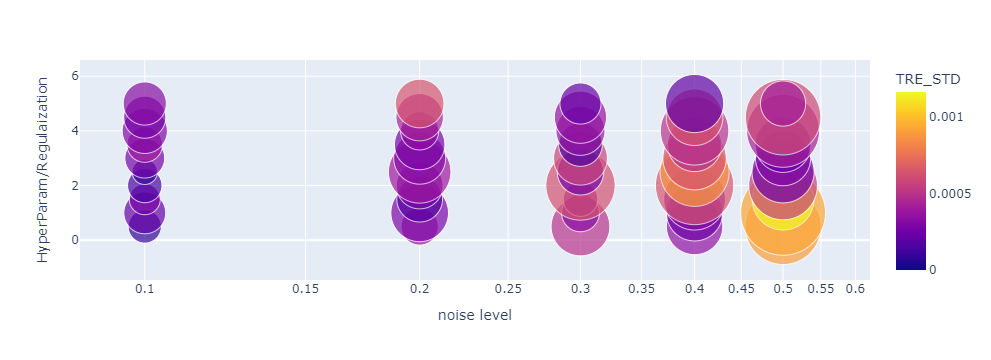

In [190]:
#SVM in circles  with samples=10K

fig = px.scatter(df_circles_svm_summerized_std.loc[(df_circles_svm_summerized_std['samples'] == 10000)], x="noise level", y="HyperParam/Regulaization",
	         size="E_DIFF_STD", color="TRE_STD",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

In [ ]:
# As shown in Graph above, the best model for circules dataset using SVM  model with n=10K, is the ones with the smallest bubles and darker colors,
# meaning with noise level=0.1 and gamma=2.5

##### for SVM in moon

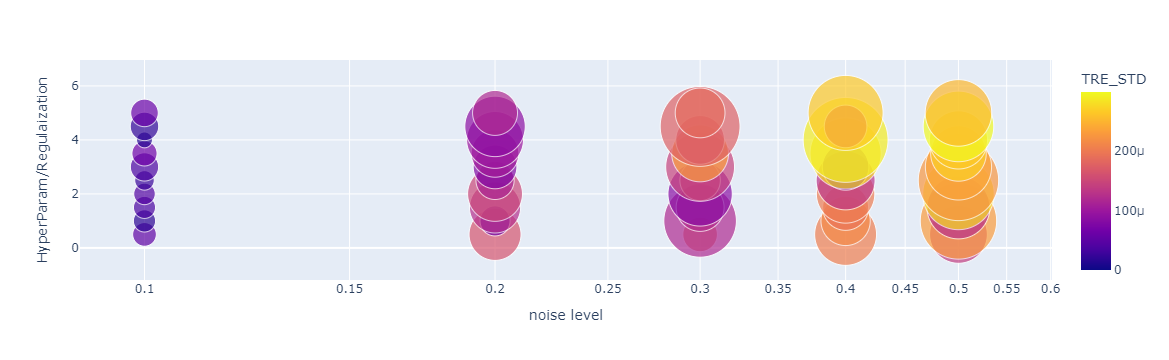

In [191]:
#SVM in moon  with samples=10K

fig = px.scatter(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['samples'] == 10000)], x="noise level", y="HyperParam/Regulaization",
	         size="E_DIFF_STD", color="TRE_STD",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

In [ ]:
# As shown in Graph above, the best model for circules dataset using SVM  model with n=10K, is the ones with the smallest bubles and darker colors,
# meaning with noise level=0.1 and gamma=4

In [174]:
df_moon_svm.query('samples == 10000').groupby(['samples','noise level','HyperParam/Regulaization']).std().sort_values("E_DIFF") #by standart deviation

Unnamed: 0  KFOLD       TRE  \
samples noise level HyperParam/Regulaization                                
10000   0.0         0.5                        15.811388    0.0  0.000000   
                    1.0                        15.811388    0.0  0.000000   
                    1.5                        15.811388    0.0  0.000000   
                    2.0                        15.811388    0.0  0.000000   
                    2.5                        15.811388    0.0  0.000000   
                    3.0                        15.811388    0.0  0.000000   
                    3.5                        15.811388    0.0  0.000000   
                    4.0                        15.811388    0.0  0.000000   
                    4.5                        15.811388    0.0  0.000000   
                    5.0                        15.811388    0.0  0.000000   
        0.1         4.0                        15.811388    0.0  0.000014   
                    2.5                        15.811388    0.0  0.000025   
                    2.0                        15.811388    0.0  0.000042   
                    1.5                        15.811388    0.0  0.000037   
                    1.0                        15.811388    0.0  0.000018   
                    0.5                        15.811388    0.0  0.000052   
                    3.5                        15.811388    0.0  0.000065   
                    5.0                        15.811388    0.0  0.000061   
                    3.0                        15.811388    0.0  0.000038   
                    4.5                        15.811388    0.0  0.000021   
        0.2         1.0                        15.811388    0.0  0.000064   
        0.3         0.5                        15.811388    0.0  0.000185   
        0.2         2.5                        15.811388    0.0  0.000115   
        0.3         2.5                        15.811388    0.0  0.000143   
        0.4         4.5                        15.811388    0.0  0.000174   
        0.2         3.0                        15.811388    0.0  0.000078   
                    5.0                        15.811388    0.0  0.000119   
        0.4         1.5                        15.811388    0.0  0.000195   
                    3.0                        15.811388    0.0  0.000060   
        0.2         3.5                        15.811388    0.0  0.000105   
        0.3         1.5                        15.811388    0.0  0.000120   
                    4.0                        15.811388    0.0  0.000165   
        0.4         1.0                        15.811388    0.0  0.000215   
        0.3         5.0                        15.811388    0.0  0.000185   
        0.2         1.5                        15.811388    0.0  0.000124   
                    0.5                        15.811388    0.0  0.000163   
                    2.0                        15.811388    0.0  0.000150   
        0.5         3.5                        15.811388    0.0  0.000270   
        0.3         3.5                        15.811388    0.0  0.000232   
        0.2         4.0                        15.811388    0.0  0.000099   
        0.5         0.5                        15.811388    0.0  0.000139   
                    4.0                        15.811388    0.0  0.000265   
        0.4         2.0                        15.811388    0.0  0.000202   
                    2.5                        15.811388    0.0  0.000130   
        0.2         4.5                        15.811388    0.0  0.000087   
        0.4         0.5                        15.811388    0.0  0.000204   
        0.5         1.5                        15.811388    0.0  0.000127   
        0.3         2.0                        15.811388    0.0  0.000084   
        0.5         3.0                        15.811388    0.0  0.000237   
                    5.0                        15.811388    0.0  0.000252   
        0.3         3.0                   

In [175]:
df_moon_svm.query('samples == 10000').groupby(['samples','noise level','HyperParam/Regulaization']).mean().sort_values("E_DIFF") #by mean

Unnamed: 0  KFOLD       TRE  \
samples noise level HyperParam/Regulaization                                
10000   0.0         0.5                            270.0    5.0  1.000000   
                    1.0                            271.0    5.0  1.000000   
                    1.5                            272.0    5.0  1.000000   
                    2.0                            273.0    5.0  1.000000   
                    2.5                            274.0    5.0  1.000000   
                    3.0                            275.0    5.0  1.000000   
                    3.5                            276.0    5.0  1.000000   
                    4.0                            277.0    5.0  1.000000   
                    4.5                            278.0    5.0  1.000000   
                    5.0                            279.0    5.0  1.000000   
        0.1         0.5                            570.0    5.0  0.998765   
                    2.5                            574.0    5.0  0.999125   
                    1.0                            571.0    5.0  0.999050   
                    1.5                            572.0    5.0  0.999155   
                    3.0                            575.0    5.0  0.999135   
                    3.5                            576.0    5.0  0.999160   
                    2.0                            573.0    5.0  0.999140   
                    4.5                            578.0    5.0  0.999230   
        0.4         0.5                           1470.0    5.0  0.862265   
        0.1         4.0                            577.0    5.0  0.999235   
        0.2         0.5                            870.0    5.0  0.969775   
        0.5         0.5                           1770.0    5.0  0.817525   
        0.1         5.0                            579.0    5.0  0.999250   
        0.2         2.5                            874.0    5.0  0.971980   
                    1.5                            872.0    5.0  0.972090   
        0.4         2.0                           1473.0    5.0  0.864335   
        0.2         5.0                            879.0    5.0  0.971855   
                    1.0                            871.0    5.0  0.972100   
                    2.0                            873.0    5.0  0.971890   
        0.4         2.5                           1474.0    5.0  0.864650   
        0.3         2.0                           1173.0    5.0  0.912785   
        0.2         4.0                            877.0    5.0  0.971795   
        0.3         1.5                           1172.0    5.0  0.912580   
        0.2         3.0                            875.0    5.0  0.971960   
        0.3         0.5                           1170.0    5.0  0.912000   
                    1.0                           1171.0    5.0  0.912920   
        0.2         4.5                            878.0    5.0  0.971795   
        0.4         1.5                           1472.0    5.0  0.863970   
        0.3         2.5                           1174.0    5.0  0.913190   
        0.2         3.5                            876.0    5.0  0.971865   
        0.4         3.0                           1475.0    5.0  0.864995   
        0.5         1.5                           1772.0    5.0  0.817580   
        0.3         3.5                           1176.0    5.0  0.914100   
        0.4         1.0                           1471.0    5.0  0.863280   
        0.3         4.0                           1177.0    5.0  0.914310   
        0.4         4.0                           1477.0    5.0  0.865110   
        0.3         4.5                           1178.0    5.0  0.914375   
                    3.0                           1175.0    5.0  0.913840   
        0.5         1.0                           1771.0    5.0  0.817600   
        0.4         4.5                           1478.0    5.0  0.865375   
        0.5         3.0                   

In [176]:
df_circles_svm.query('samples == 10000').groupby(['noise level','HyperParam/Regulaization']).mean().sort_values("E_DIFF")

Unnamed: 0  samples  KFOLD       TRE  \
noise level HyperParam/Regulaization                                         
0.0         0.5                            270.0  10000.0    5.0  1.000000   
            1.0                            271.0  10000.0    5.0  1.000000   
            1.5                            272.0  10000.0    5.0  1.000000   
            2.0                            273.0  10000.0    5.0  1.000000   
            2.5                            274.0  10000.0    5.0  1.000000   
            3.0                            275.0  10000.0    5.0  1.000000   
            3.5                            276.0  10000.0    5.0  1.000000   
            4.0                            277.0  10000.0    5.0  1.000000   
            4.5                            278.0  10000.0    5.0  1.000000   
            5.0                            279.0  10000.0    5.0  1.000000   
0.1         0.5                            570.0  10000.0    5.0  0.848370   
            1.0                            571.0  10000.0    5.0  0.848945   
            3.0                            575.0  10000.0    5.0  0.849390   
            2.5                            574.0  10000.0    5.0  0.849295   
            1.5                            572.0  10000.0    5.0  0.849135   
            2.0                            573.0  10000.0    5.0  0.849300   
0.3         1.5                           1172.0  10000.0    5.0  0.633080   
0.1         3.5                            576.0  10000.0    5.0  0.849360   
            5.0                            579.0  10000.0    5.0  0.849515   
0.2         0.5                            870.0  10000.0    5.0  0.685995   
0.1         4.0                            577.0  10000.0    5.0  0.849495   
0.3         1.0                           1171.0  10000.0    5.0  0.631610   
0.2         2.5                            874.0  10000.0    5.0  0.686665   
0.1         4.5                            578.0  10000.0    5.0  0.849480   
0.3         0.5                           1170.0  10000.0    5.0  0.630120   
0.2         2.0                            873.0  10000.0    5.0  0.686450   
            1.5                            872.0  10000.0    5.0  0.685340   
0.3         3.0                           1175.0  10000.0    5.0  0.633435   
0.4         1.0                           1471.0  10000.0    5.0  0.590875   
0.2         1.0                            871.0  10000.0    5.0  0.687220   
            3.0                            875.0  10000.0    5.0  0.686520   
            4.0                            877.0  10000.0    5.0  0.686795   
0.4         0.5                           1470.0  10000.0    5.0  0.591030   
0.2         5.0                            879.0  10000.0    5.0  0.687335   
0.3         2.5                           1174.0  10000.0    5.0  0.633195   
0.2         3.5                            876.0  10000.0    5.0  0.686430   
0.3         3.5                           1176.0  10000.0    5.0  0.633855   
0.5         1.0                           1771.0  10000.0    5.0  0.569520   
0.4         1.5                           1472.0  10000.0    5.0  0.592355   
0.2         4.5                            878.0  10000.0    5.0  0.686950   
0.3         2.0                           1173.0  10000.0    5.0  0.633610   
            4.0                           1177.0  10000.0    5.0  0.633945   
            4.5                           1178.0  10000.0    5.0  0.634215   
0.4         2.0                           1473.0  10000.0    5.0  0.592385   
            3.0                           1475.0  10000.0    5.0  0.593120   
            2.5                           1474.0  10000.0    5.0  0.593190   
0.3         5.0                           1179.0  10000.0    5.0  0.634315   
0.5         0.5                           1770.0  10000.0    5.0  0.570990   
0.4         4.0                           1477.0  10000.0    5.0  0.594080   
            3.5                           1476.0  10000.0   

#### Answer Q2

In [ ]:
# df_circles_svm_summerized_std
# df_moon_svm_summerized_std

##### for SVM in moon

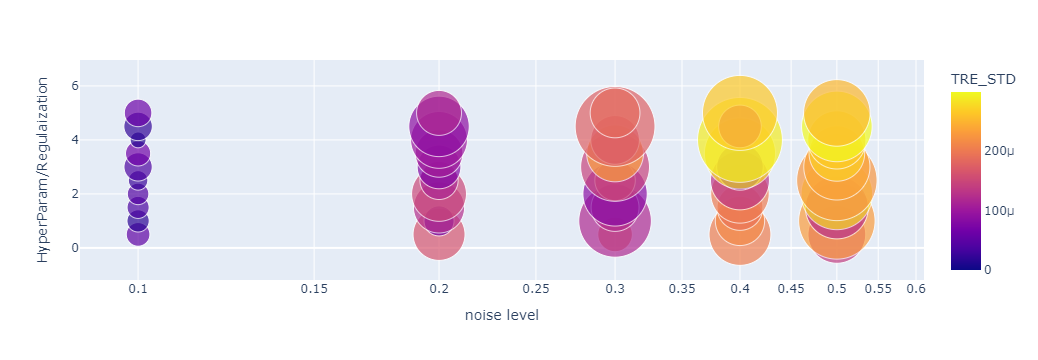

In [184]:
#SVM in moons with samples=10K

fig = px.scatter(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['samples'] == 10000)], x="noise level", y="HyperParam/Regulaization",
	         size="E_DIFF_STD", color="TRE_STD",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

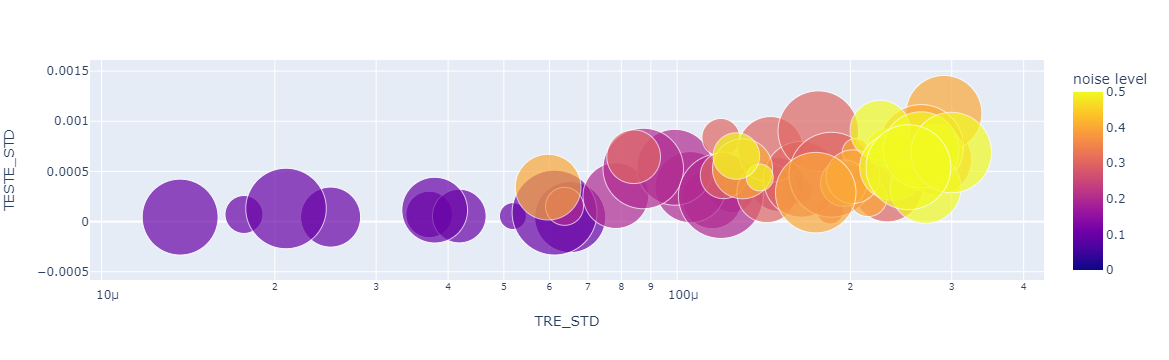

In [193]:
#SVM in moons with samples=10K

fig = px.scatter(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['samples'] == 10000)], x="TRE_STD", y="TESTE_STD",
	         size="HyperParam/Regulaization", color="noise level",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

In [ ]:
# As shown in Graph above, the best model for circules dataset using SVM  model with n=10K, is the ones with the smallest bubles and darker colors,
# meaning with noise level=0.1 and gamma=4. this model is with low bias and high variance

##### for SVM in Circles

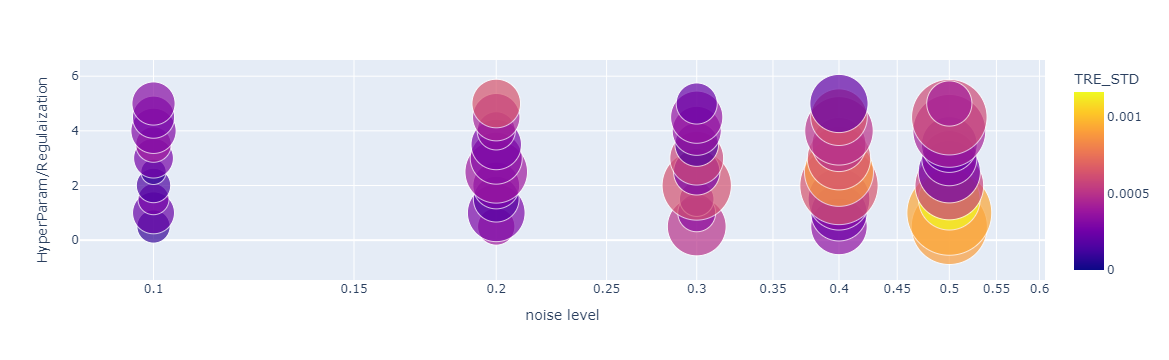

In [195]:
#SVM in circles with with samples=10K

fig = px.scatter(df_circles_svm_summerized_std.loc[(df_circles_svm_summerized_std['samples'] == 10000)], x="noise level", y="HyperParam/Regulaization",
	         size="E_DIFF_STD", color="TRE_STD",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

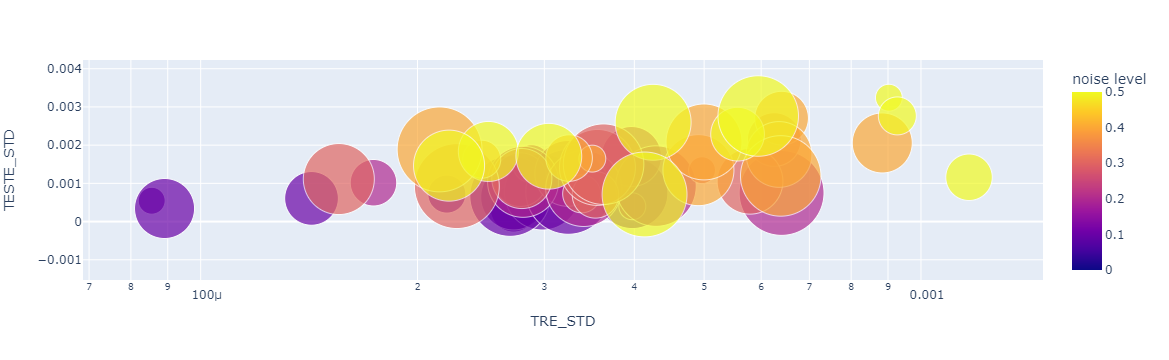

In [194]:
#SVM in circles with with samples=10K

fig = px.scatter(df_circles_svm_summerized_std.loc[(df_circles_svm_summerized_std['samples'] == 10000)], x="TRE_STD", y="TESTE_STD",
	         size="HyperParam/Regulaization", color="noise level",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

In [192]:
# As shown in Graph above, the best model for circules dataset using SVM  model with n=10K, is the ones with the smallest bubles and darker colors,
# meaning with noise level=0.1 and gamma=2.5  this model is with low bias and high variance

#### Answer Q3

In [ ]:
#demonstrate using widgets:

# @widgets.interact
# def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
#     df = make_circles_dataframe(1000, noise_level)
#     return px.scatter(df, x='x', y='y', color = 'label')

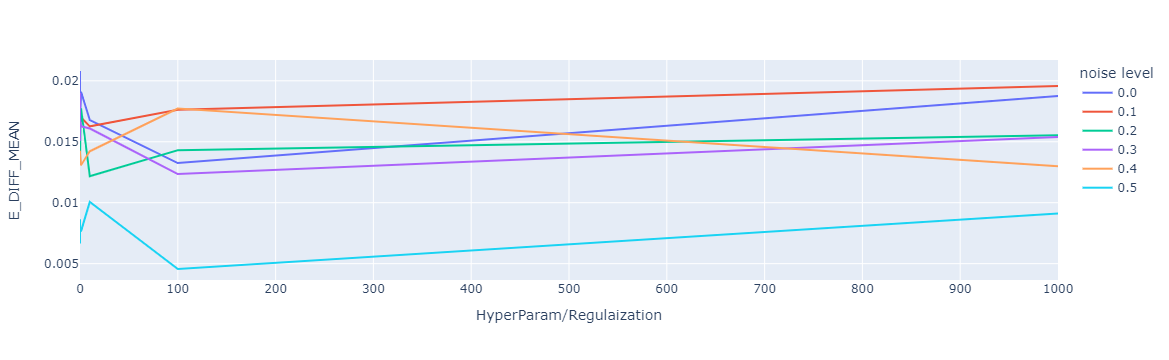

In [203]:
#for 10K samples dataset
px.line(df_circules_logit_summerized_mean.loc[(df_circules_logit_summerized_mean['samples'] == 10000)], y='E_DIFF_MEAN',x='HyperParam/Regulaization', color = 'noise level')

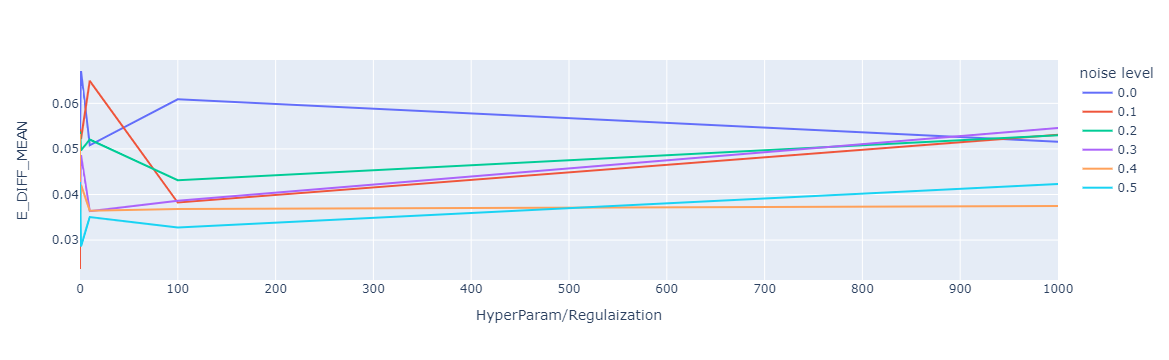

In [204]:
#for 1K samples dataset
px.line(df_circules_logit_summerized_mean.loc[(df_circules_logit_summerized_mean['samples'] == 1000)], y='E_DIFF_MEAN',x='HyperParam/Regulaization', color = 'noise level')

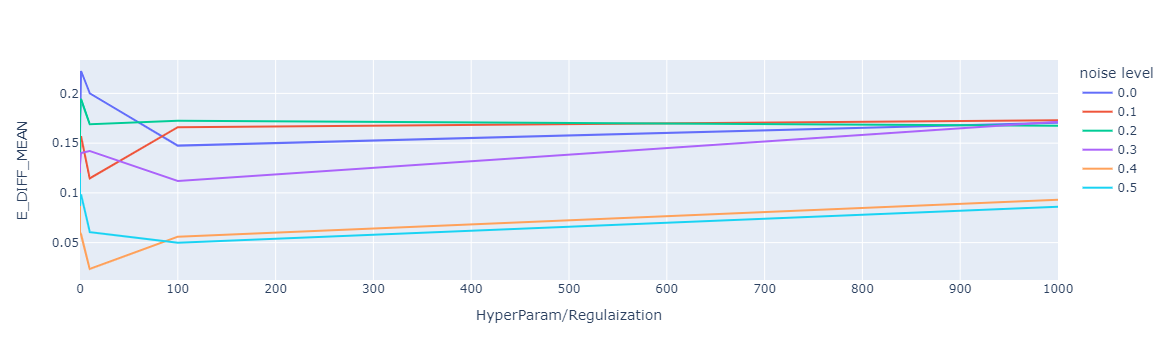

In [205]:
#for 100 samples dataset
px.line(df_circules_logit_summerized_mean.loc[(df_circules_logit_summerized_mean['samples'] == 100)], y='E_DIFF_MEAN',x='HyperParam/Regulaization', color = 'noise level')

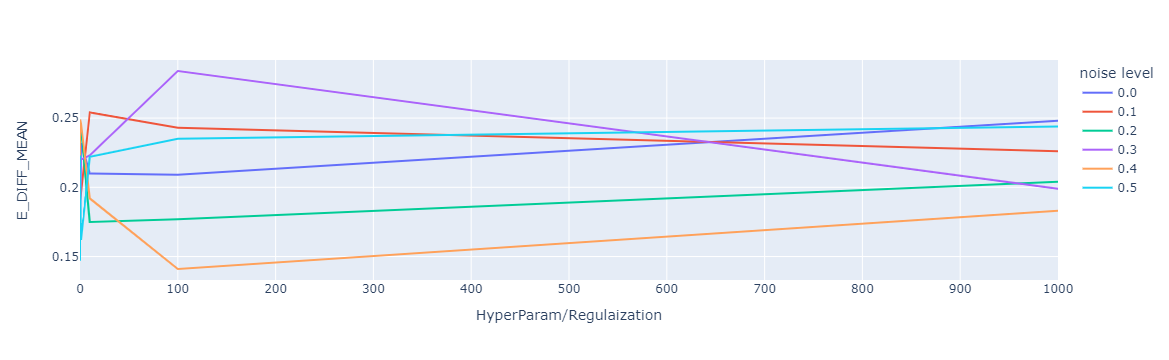

In [206]:
#for 50 samples dataset
px.line(df_circules_logit_summerized_mean.loc[(df_circules_logit_summerized_mean['samples'] == 50)], y='E_DIFF_MEAN',x='HyperParam/Regulaization', color = 'noise level')

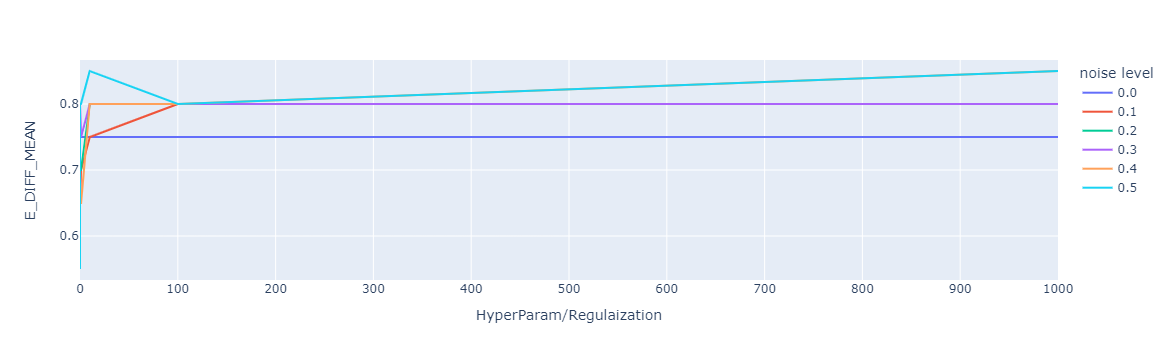

In [207]:
#for 5 samples dataset
px.line(df_circules_logit_summerized_mean.loc[(df_circules_logit_summerized_mean['samples'] == 5)], y='E_DIFF_MEAN',x='HyperParam/Regulaization', color = 'noise level')

In [ ]:
# As shown in Graphs, the linear models become stable at regularization=100 point, for each case of the n samples that were examined above.

#### Answer Q4

##### for LG model

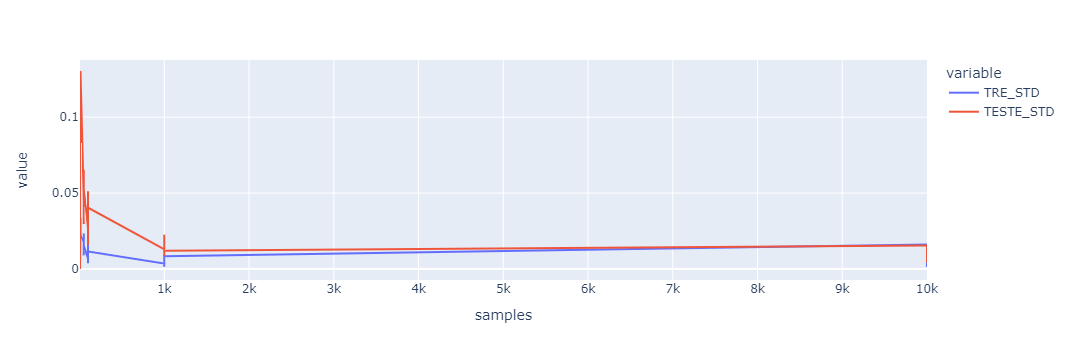

In [177]:
#LG for circules with noise level=0.2

px.line(df_circules_logit_summerized_std.loc[(df_circules_logit_summerized_std['noise level'] == 0.2)],x='samples', y=(['TRE_STD','TESTE_STD'])

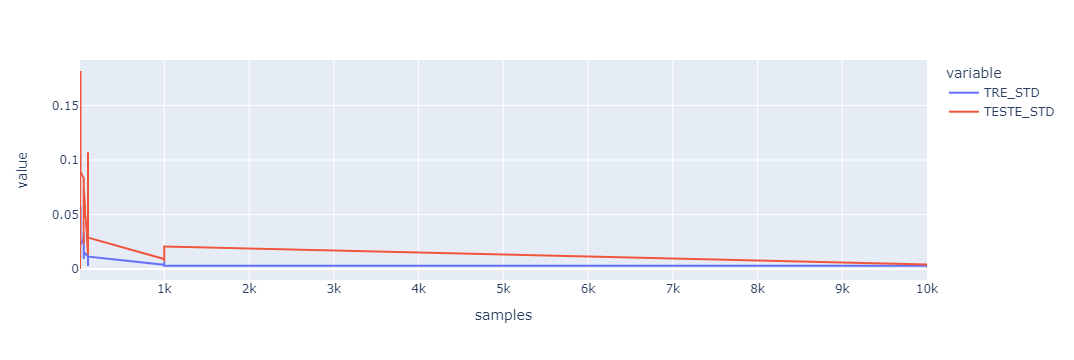

In [178]:
#LG for circules with noise level==0.5

px.line(df_circules_logit_summerized_std.loc[(df_circules_logit_summerized_std['noise level'] == 0.5)],x='samples', y=['TRE_STD','TESTE_STD'])

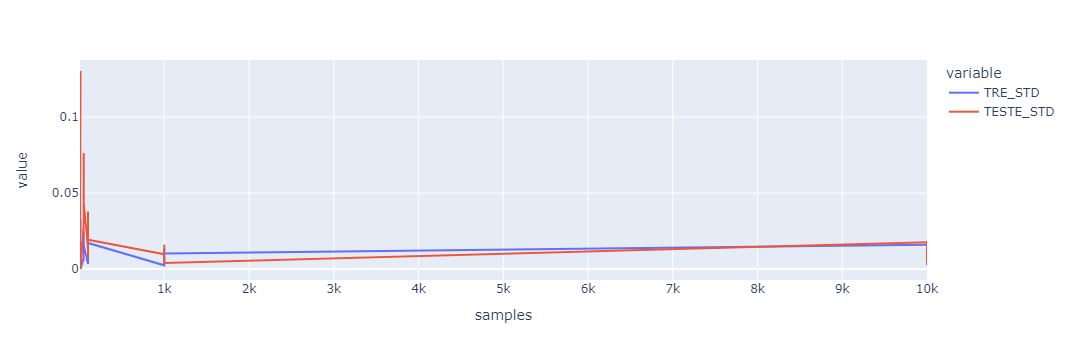

In [74]:
#LG for circules with noise level==0

px.line(df_circules_logit_summerized_std.loc[(df_circules_logit_summerized_std['noise level'] == 0)],x='samples', y=['TRE_STD','TESTE_STD'])

In [ ]:
#in LG model train error and test error differ from each other mostly in small sample sizes models. starting from 1K samples size model, 
#the difference between train error and test error remains the same

##### for SVM model

In [ ]:
# df_circules_logit
# df_circules_logit_summerized_std
# df_circules_logit_summerized_mean


# df_moon_logit
# df_moon_logit_summerized_std
# df_moon_logit_summerized_mean

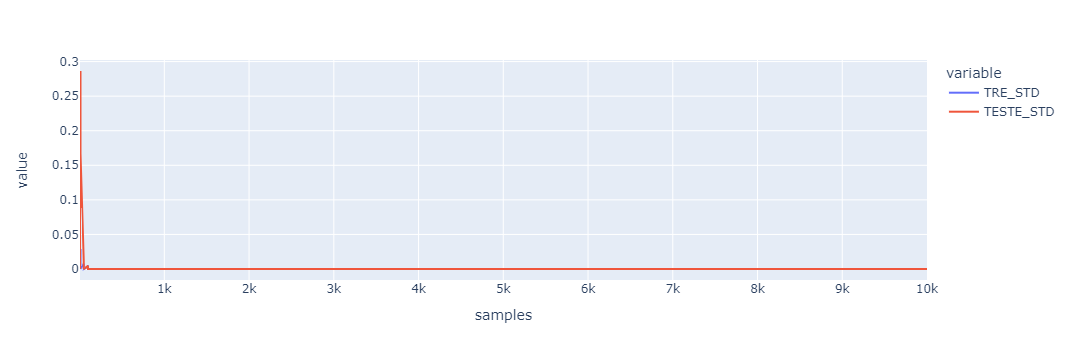

In [84]:
#SVM for moon with noise level=0

px.line(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['noise level'] == 0)],x='samples', y=['TRE_STD','TESTE_STD'])

In [ ]:
#in SVM model for noise level=0 ,the difference between train error and test error remains the same starting from 100 samples size model

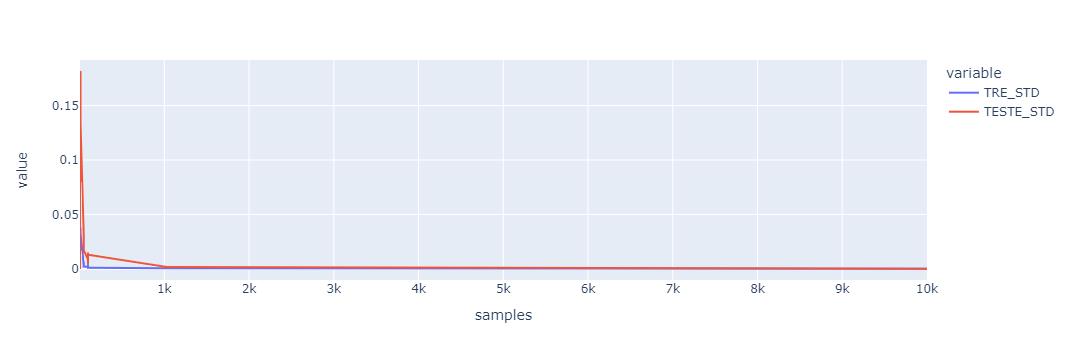

In [85]:
#SVM for moon with noise level=0.2

px.line(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['noise level'] == 0.2)],x='samples', y=['TRE_STD','TESTE_STD'])

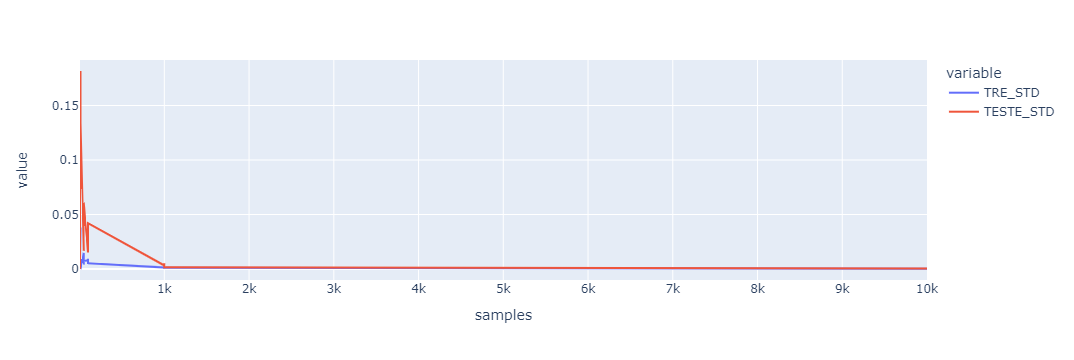

In [86]:
#SVM for moon with noise level=0.5

px.line(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['noise level'] == 0.5)],x='samples', y=['TRE_STD','TESTE_STD'])

In [ ]:
#in SVM model for noise level (0.5,0.2) train error and test error differ from each other mostly in small sample sizes models. starting from 1K samples size model, 
#the difference between train error and test error remains the same

#### Answer Q5

##### for SVM model

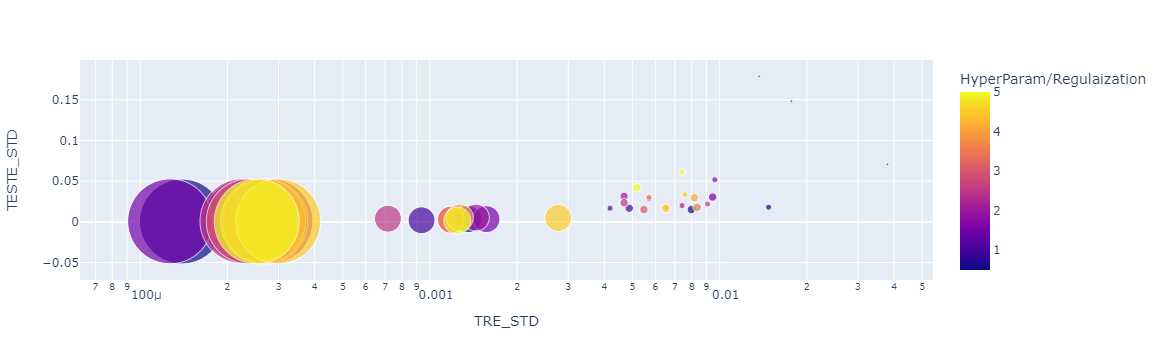

In [211]:
#SVM in moons with noise level=0.5

fig = px.scatter(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['noise level'] == 0.5)]
                 , x="TRE_STD", y="TESTE_STD",
	         size="samples", color="HyperParam/Regulaization",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

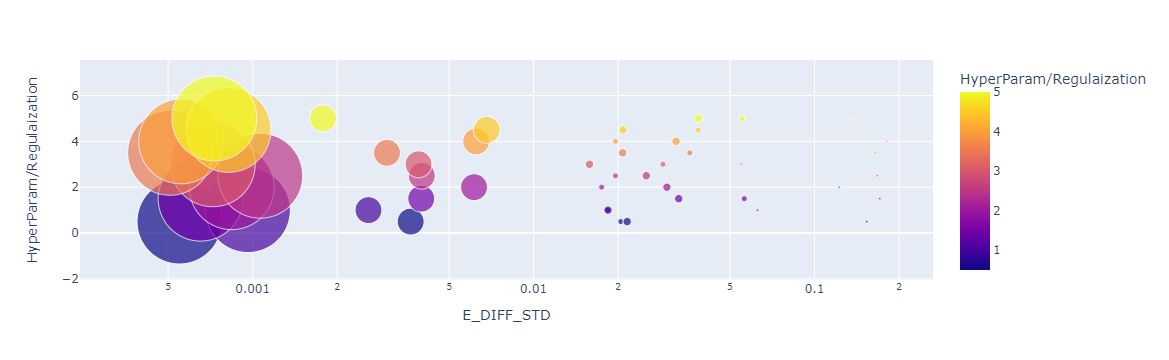

In [213]:
#SVM in moons with noise level=0.5

fig = px.scatter(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['noise level'] == 0.5)]
                 , x="E_DIFF_STD", y="HyperParam/Regulaization",
	         size="samples", color="HyperParam/Regulaization",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

In [ ]:
# For SVM model, Gamma has no special impact on E Diff Error  

##### for LG model

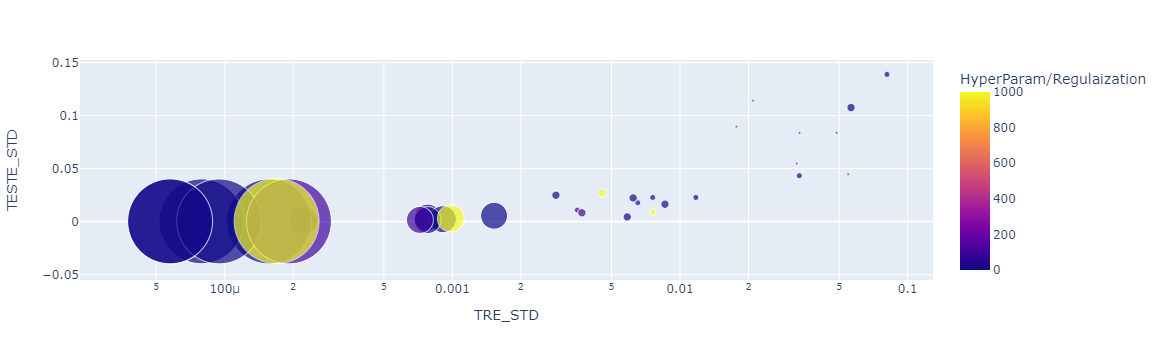

In [214]:
#LG in moon with noise level=0.5

fig = px.scatter(df_moon_logit_summerized_std.loc[(df_moon_logit_summerized_std['noise level'] == 0.5)]
                 , x="TRE_STD", y="TESTE_STD",
	         size="samples", color="HyperParam/Regulaization",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

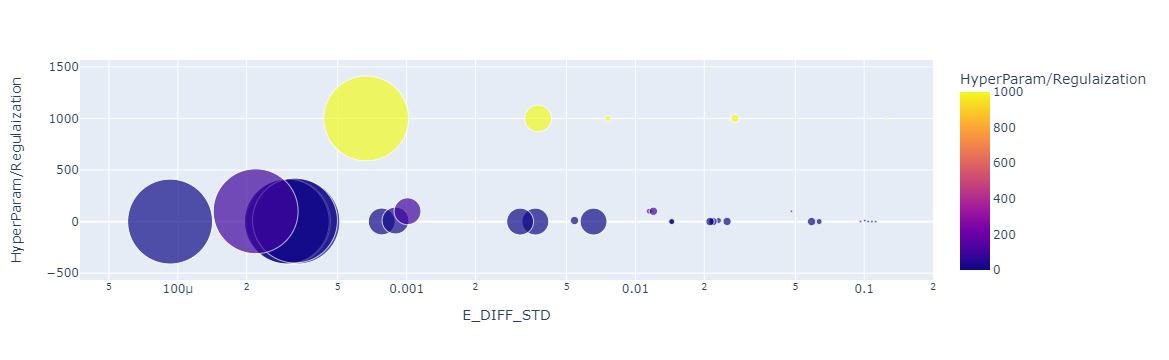

In [215]:
#SVM in moons with noise level=0.5

fig = px.scatter(df_moon_logit_summerized_std.loc[(df_moon_logit_summerized_std['noise level'] == 0.5)]
                 , x="E_DIFF_STD", y="HyperParam/Regulaization",
	         size="samples", color="HyperParam/Regulaization",
                 hover_name="E_DIFF_STD", log_x=True, size_max=60)
fig.show()

In [ ]:
# For LG model, Hyper parameter =0 is common  for all e_diff_error 

#### Answer Q6

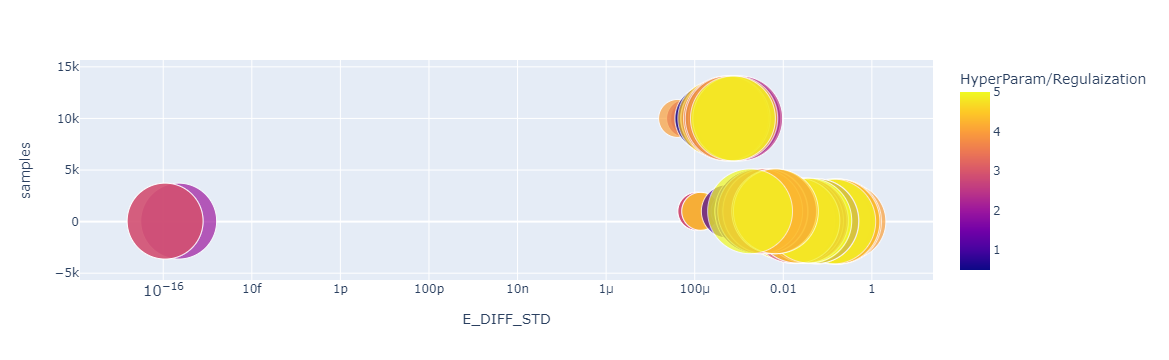

In [228]:
#SVM in moons with E_DIFF_STD=0 as indication for optimized test result

fig = px.scatter(df_moon_svm_summerized_std, x="E_DIFF_STD" , y="samples",
	         size="noise level", color="HyperParam/Regulaization",
                 hover_name="noise level", log_x=True, size_max=60)
fig.show()

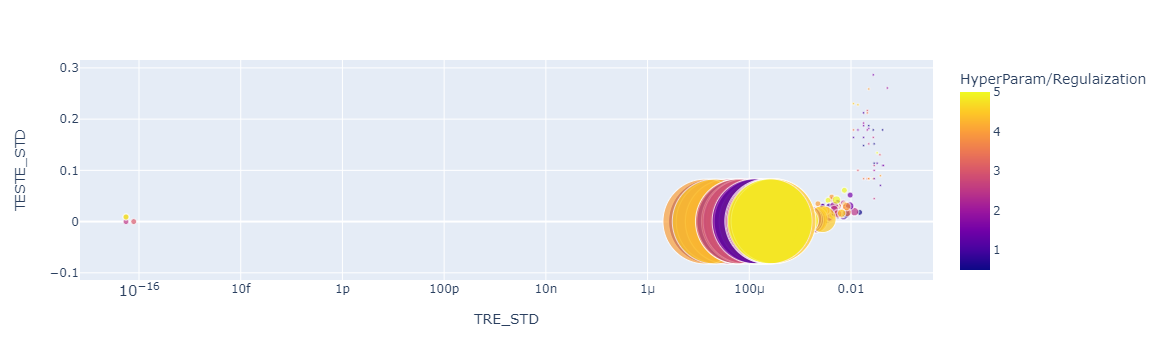

In [227]:
#SVM in moons with E_DIFF_STD=0 as indication for optimized test result

fig = px.scatter(df_moon_svm_summerized_std, x="TRE_STD" , y="TESTE_STD",
	         size="samples", color="HyperParam/Regulaization",
                 hover_name="noise level", log_x=True, size_max=60)
fig.show()

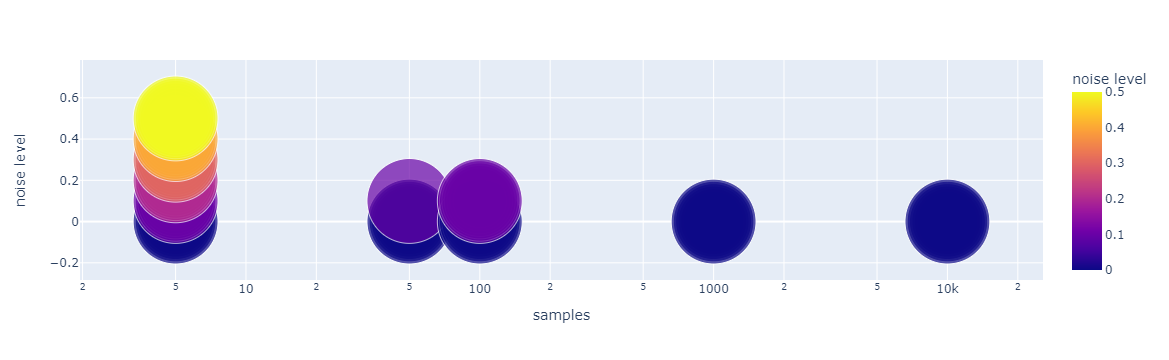

In [229]:
#SVM in moons with E_DIFF_STD=0 as indication for optimized test result

fig = px.scatter(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['E_DIFF_STD'] == 0)], x="samples", y="noise level",
	         size="HyperParam/Regulaization", color="noise level",
                 hover_name="TESTE_STD", log_x=True, size_max=60)
fig.show()

In [ ]:
# The optimal model is can be created from several noise level, 
#but for high noise level (0.5, 0.4, 0.3..) the optimal model was created only for low samples capacity

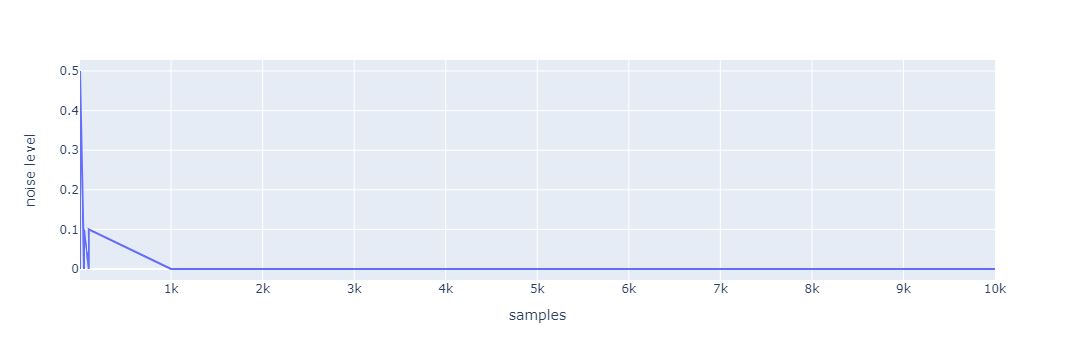

In [115]:
#SVM in moons with  E_DIFF_STD ==0  as indication for optimized test result

px.line(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['E_DIFF_STD'] == 0)],x='samples', y="noise level")

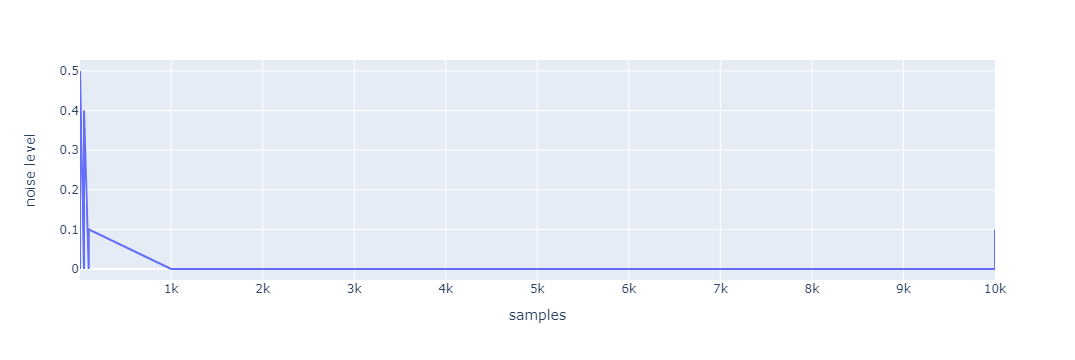

In [113]:
#SVM in moons with -0.0001 <= E_DIFF_STD <= 0.0001  as indication for optimized test result

px.line(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['E_DIFF_STD'] <= 0.0001) & (df_moon_svm_summerized_std['E_DIFF_STD'] >= -0.0001)],x='samples', y="noise level")

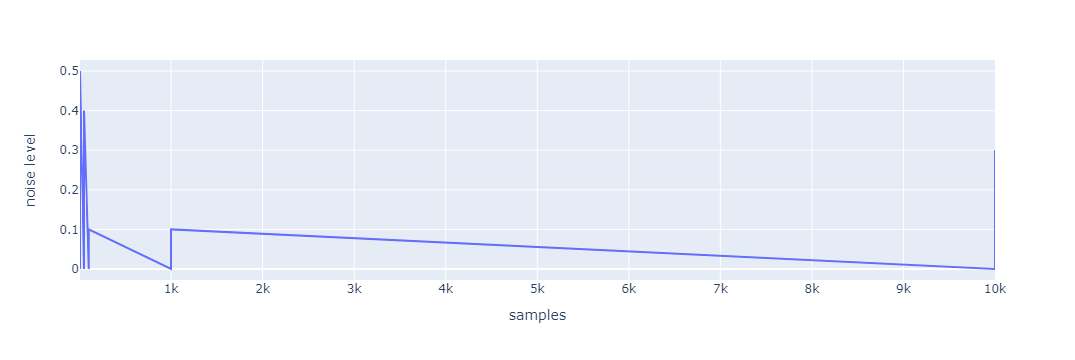

In [114]:
#SVM in moons with -0.0002 <= E_DIFF_STD <= 0.0002  as indication for optimized test result

px.line(df_moon_svm_summerized_std.loc[(df_moon_svm_summerized_std['E_DIFF_STD'] <= 0.0002) & (df_moon_svm_summerized_std['E_DIFF_STD'] >= -0.0002)],x='samples', y="noise level")

In [ ]:
# the optimal SVM model 

## Tips and Hints

For buliding the experiment:

* Start with one dataframe holding all the data for both datastes with different noise level. Use the `make_<dataset_name>_dataframe()` functions below, and add two columns, dataset_name and noise_level, before appending the new dataset to the rest of the datasets. Use `df = pd.DataFrame()` to start with an empty dataframe and using a loop, add data to it using `df = df.append(<the needed df here>)`. Verify that you have 10k samples for each dataset type and noise level by a proper `.value_counts()`. You can modify the 
* When you'll need an N samples data with a specific noise level, use `query()` and `head(n)` to get the needed dataset. 
* Use sklearn `train_test_split()` method to split the data with `test_size` and `random_state` parameters set correctly to ensure you are always splitting the data the same why for a given fold `k`. Read [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) if needed. 
* You can also not create your own data splitter, and instead use `model_selection.cross_validate()` from sklearn. You'll need to ask for the train erros as well as the test errors, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).
* Use prints in proper location to ensure the progress of the experiment. 

**If you get stuck, and need refernce, scroll to the end of the notebook to see more hints!**

## Moons dataset

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
moons_df = make_moons_dataframe(n_samples=1000, noise_level=0.1)
moons_df.head()

In [ ]:
@widgets.interact
def plot_noisy_moons(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    moons_df = make_moons_dataframe(n_samples=1000, noise_level=noise_level)
    return px.scatter(moons_df, x='x', y='y', color = 'label')

## Circles Dataset

In [ ]:
circles_df = make_circles_dataframe(n_samples=500, noise_level=0)
circles_df.head()

In [ ]:
@widgets.interact
def plot_noisy_circles(noise_level = widgets.FloatSlider(value=0, min=0, max=0.5, step=0.05)):
    df = make_circles_dataframe(1000, noise_level)
    return px.scatter(df, x='x', y='y', color = 'label')

## Appendix

### More hints!

If you'll build the datasets dataframe correctly, you'll have **one** dataframe that has dataset_name and noise_level colmuns, as well as the regular x,y,label colmns. To unsure you've appended everything correctly, groupby the proper colmuns and look at the size:

In [ ]:
# Use proper groupby statement to ensure the datasets dataframe contains data as expected. You should see the following result:

Your 

You experiment code should look something like that:

In [ ]:
datasets_type = ['circles', 'moons']
k_folds = 10
n_samples = [10, 50, 100, 1000, 10000]
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5]
clf_types = ['log_reg', 'svm']
penalty_range = [2,4,6,8,10,12,14]
regularization_values = <'Your regularization values here'>
results = []
for ds_type in datasets_type:
    print(f'Working on {ds_type}')
    for nl in noise_levels:
        for n in n_samples:
            ds = datasets.query(<'your query here'>).head(n)
            print(f'Starting {k_folds}-fold cross validation for {ds_type} datasets with {n} samples and noise level {nl}. Going to train {clf_types} classifiers.')
            for k in range(k_folds):
                X, Y = <'Your code here'>
                x_train,x_test,y_train,y_test= <'Your code here'>
                for clf_type in clf_types:
                    if clf_type == 'log_reg':
                        for regularization_value in regularization_values:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)
                    if clf_type == 'svm':
                        for gamma in hp_range:
                            train_acc, test_acc = <'Your code here'>
                            results.append(<'Your code here'>)

### Question 1 - Manual Classification

The purpose of this excercise is to examplify the need in a fitting algorithm. We will do so by trying to find only 2 models parameters by ourselves. 

In [ ]:
slope, intercept = 2.5, 6

In [ ]:
x_1, x_2 = 0.2, 0.6
on_line = [[x, x*slope + intercept,'on_line'] for x in np.linspace(-1,2,100)]

above_line = [[x_1, x_1*slope + intercept + 2, 'Above'], 
              [x_2, x_2*slope + intercept + 2, 'Above']] 

below_line = [[x_1, x_1*slope + intercept - 2, 'Below'], 
              [x_2, x_2*slope + intercept - 2, 'Below']] 

In [ ]:
columns = ['x','y','label']
data = pd.DataFrame(on_line + above_line + below_line, columns = columns)

In [ ]:
px.scatter(data, x='x', y='y', color = 'label')